In [1]:
# IMDB 리뷰 데이터 셋 (영화리뷰 데이터 셋) - 순환신경망에서 가장 많이 활용되는 데이터 셋임

from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) \
            = imdb.load_data(num_words=500)

In [2]:
# 훈련 세트에서 2(어휘 사전에 없는 단어) 제외하기

for i in range(len(train_input)):
    train_input[i] = [w for w in train_input[i] if w > 2]

In [3]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target \
        = train_test_split(train_input, train_target, 
                           test_size=0.2, random_state=1234)

In [4]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [5]:
print(np.mean(lengths), np.median(lengths))

164.0498 126.0


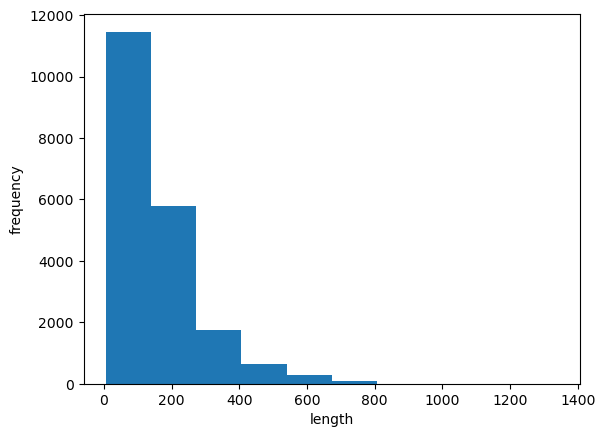

In [6]:
import matplotlib.pyplot as plt

plt.hist(lengths) #나무막대 그래프로 각 토큰별 단어의 빈도수를 시각화하여 확인해보도록 한다.
plt.xlabel('length')
plt.ylabel('frequency') #빈도수
plt.show()

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100) 
train_seq.shape

(20000, 100)

In [8]:
val_seq = pad_sequences(val_input, maxlen=100)

### 순환 신경망 만들기

In [9]:
from tensorflow import keras

model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8)) #개선이 된 알고리즘을 적용할 수 있음.
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [10]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics='accuracy')

In [11]:
loss = model2.fit(train_seq, train_target, epochs=50, 
                 validation_data=(val_seq, val_target))

Epoch 1/50
625/625 [==============================] - 12s 16ms/step - loss: 0.6887 - accuracy: 0.5650 - val_loss: 0.6653 - val_accuracy: 0.6092
Epoch 2/50
625/625 [==============================] - 9s 14ms/step - loss: 0.5732 - accuracy: 0.7503 - val_loss: 0.5454 - val_accuracy: 0.7716
Epoch 3/50
625/625 [==============================] - 9s 14ms/step - loss: 0.5169 - accuracy: 0.7852 - val_loss: 0.5144 - val_accuracy: 0.7664
Epoch 4/50
625/625 [==============================] - 9s 15ms/step - loss: 0.4838 - accuracy: 0.7908 - val_loss: 0.4796 - val_accuracy: 0.7874
Epoch 5/50
625/625 [==============================] - 9s 15ms/step - loss: 0.4529 - accuracy: 0.8027 - val_loss: 0.4565 - val_accuracy: 0.7942
Epoch 6/50
625/625 [==============================] - 9s 15ms/step - loss: 0.4316 - accuracy: 0.8122 - val_loss: 0.4406 - val_accuracy: 0.8036
Epoch 7/50
625/625 [==============================] - 9s 15ms/step - loss: 0.4182 - accuracy: 0.8160 - val_loss: 0.4310 - val_accuracy: 0.812

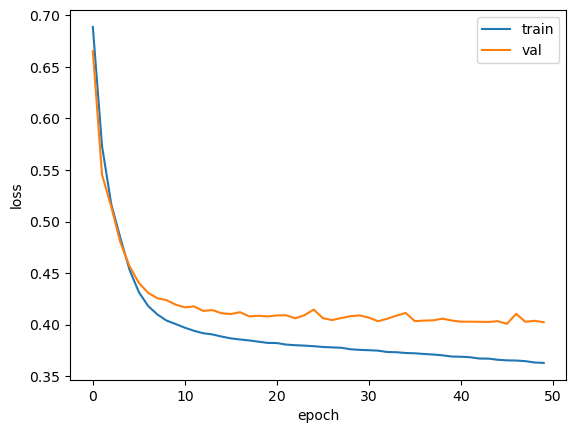

In [12]:
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()